<a href="https://colab.research.google.com/github/Adeliawulan282/Tugas1_PBOPR/blob/master/PkbFuzzy_Kelompok9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=1507ed39ff6a2621df92dd056ca54045bf3e4fd09ab1676c3d88a2ad1db00b5b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Input jumlah kendaraan(1-40): 3
Input jarak perjalanan(1-20): 19
5.000000000000002


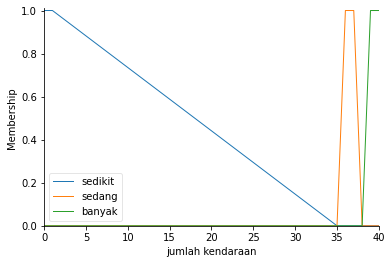

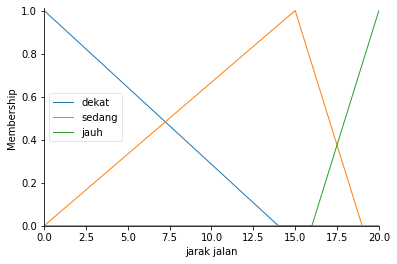

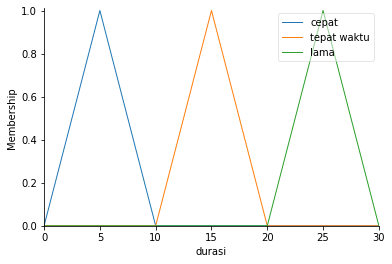

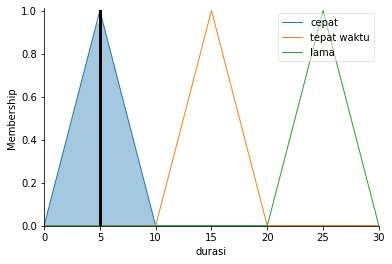

In [ ]:
import numpy as np
!pip install scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

#Variable input dan output
jumlahKendaraan = ctrl.Antecedent(np.arange(0, 41, 1), 'jumlah kendaraan')
jarak = ctrl.Antecedent(np.arange(0, 21, 1), 'jarak jalan')
durasi = ctrl.Consequent(np.arange(0, 31, 1), 'durasi')

#Range untuk jumlah kendaraan
jumlahKendaraan['sedikit'] = fuzz.trapmf(jumlahKendaraan.universe, [0, 0, 1, 35])
jumlahKendaraan['sedang'] = fuzz.trapmf(jumlahKendaraan.universe, [36, 36, 37, 38])
jumlahKendaraan['banyak'] = fuzz.trapmf(jumlahKendaraan.universe, [38, 39, 40, 40])

# #Range lebar jalan
# lebarJalan['sempit'] = fuzz.trimf(lebarJalan.universe, [0, 0, 14])
# lebarJalan['sedang'] = fuzz.trimf(lebarJalan.universe, [0, 15, 19])
# lebarJalan['lebar'] = fuzz.trimf(lebarJalan.universe, [16, 20, 20])

#Range jarak
jarak['dekat'] = fuzz.trimf(jarak.universe, [0, 0, 14])
jarak['sedang'] = fuzz.trimf(jarak.universe, [0, 15, 19])
jarak['jauh'] = fuzz.trimf(jarak.universe, [16, 20, 20])

#Range durasi
durasi['cepat'] = fuzz.trimf(durasi.universe, [0, 5, 10])
durasi['tepat waktu'] = fuzz.trimf(durasi.universe, [10, 15, 20])
durasi['lama'] = fuzz.trimf(durasi.universe, [20, 25, 30])

jumlahKendaraan.view()
jarak.view()
durasi.view()

#Rules
rule1 = ctrl.Rule(jumlahKendaraan['sedikit'] | jarak['dekat'], durasi['cepat'])
rule2 = ctrl.Rule(jumlahKendaraan['sedang']| jarak['sedang'], durasi['tepat waktu'])
rule3 = ctrl.Rule(jumlahKendaraan['banyak'] & jarak['jauh'], durasi['lama'])

durasiping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3])
durasiping = ctrl.ControlSystemSimulation(durasiping_ctrl)

ratejumlahKendaraan = int(input("Input jumlah kendaraan(1-40): "))
ratejarakJalan = int(input("Input jarak perjalanan(1-20): "))
durasiping.input['jumlah kendaraan'] = ratejumlahKendaraan
durasiping.input['jarak jalan'] = ratejarakJalan

durasiping.compute()

print(durasiping.output['durasi'])
durasi.view(sim=durasiping)